# spaceNNtime in simulated experiments

In this notebook I run spaceNNtime in a example as a demonstration and later analise other experiments

<a name="Home4"></a>

## Contents

0. [ Library and packages ](#Lib)
1. [ Functions ](#Fun)
    + 1. [Python Functions](#Pyf)
    + 2. [R Functions](#Rfu)
2. [ spaceNNtime results in simulations ](#Exp)
    + 1. [Presentation of experiment simulated data](#Prs)
    + 2. [Analise results](#Ana)
        - Correlation true vs predicted
        - Error
        - Plots
        
<a name="011"></a>
#### L. Exp011 :  1,500 randmoly exponentially distributed samples with 25% SNP density
   
<a name="Lib"></a>
## 0. Library and packages

In [1]:
%load_ext rpy2.ipython

/home/moicoll/miniconda3/envs/sNNt_R/lib/python3.11/site-packages/rpy2/ipython/rmagic.py:83: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded, as we did not manage to load `numpy` in the first place (error: No module named 'numpy').
  warnings.warn('The Python package `pandas` is strongly '


In [2]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"


In [3]:
%%R
#.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to GEOS 3.7.2, GDAL 3.0.4, PROJ 6.3.2; sf_use_s2() is TRUE

R[write to console]: You can setup a pre-configured environment with all of slendr's Python
tree-sequence dependencies (Python modules tskit, pyslim, and msprime)
by running the function setup_env().



In [4]:
%%R

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

colors = gg_color_hue(6)
col_pop = c("ALL" = "black",
            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [5]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Fun"></a>
## 1. Functions

<a name="Pfu"></a>
### A. Python Functions

<a name="Rfu"></a>
### B. R Functions


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Exp"></a>
## 2. spaceNNtime results in simulations

<a name="Prs"></a>
### A. Presentation of experiment simulated data

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [6]:
%%R

read.csv("../../files/experiments.csv", sep = ";")

      sim exp         nam met   siz  snp   pre lay  dro    typ cov std  err
1  europe   1        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
2  europe   2        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
3  europe   3        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
4  europe   4        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
5  europe   5   reference   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
6  europe   6        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
7  europe   7        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
8  europe   8        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
9  europe   9        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
10 europe  10        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
11 europe  11        loss   5  1500 1.00  sNNt  10 0.25     gt   0   0 0.00
12 europe  12  downsample  12 15000 1.00  sNNt  10 0.25     gt   0   0 0.00
13 europe  1


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Ana"></a>
### B. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [7]:
%%R

read.table("../../sandbox/europe/5/pred.txt", header = T) %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run true_lat  true_lon
1 europe   5 reference  gt   0 41517  44 1344 2.434874 57.59758 35.841407
2 europe   5 reference  gt   0 37861 118 1344 2.434874 47.66662  3.397972
3 europe   5 reference  gt   0  5791 511 1344 2.434874 29.92696 51.237838
4 europe   5 reference  gt   1 10238 212 1344 2.421335 40.47967 57.702800
5 europe   5 reference  gt   1  6002 414 1344 2.421335 32.50583 52.119993
6 europe   5 reference  gt   1 24096 812 1344 2.421335 55.81074 35.135833
  pred_lat pred_lon diff_space true_tim  pred_tim  diff_time
1 58.72136 34.57296   145.4298     5468  6966.426 -1498.4258
2 46.98407 26.22026  1715.6040     9250  8004.033  1245.9673
3 32.49509 48.32453   397.8396    43807 43380.770   426.2305
4 39.49431 58.83889   146.1939    38132 38926.027  -794.0273
5 31.72495 47.24700   467.0333    43543 44260.340  -717.3398
6 45.44235 34.32926  1154.2952    22740 24614.906 -1874.9062


In [8]:
%%R -w 1000 -h 1250

exp = "5"

read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
    select(-c(diff_time, diff_space)) %>%
    gather("stat", "value", c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>% 
    separate(stat, c("truepred", "stat"), sep = "_") %>%
    left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>% 
    mutate(truepred = factor(truepred, levels = c("true", "pred"))) -> df
    
df %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run truepred stat    value
1 europe   5 reference  gt   0 41517  44 1344 2.434874     true  lat 57.59758
2 europe   5 reference  gt   0 37861 118 1344 2.434874     true  lat 47.66662
3 europe   5 reference  gt   0  5791 511 1344 2.434874     true  lat 29.92696
4 europe   5 reference  gt   1 10238 212 1344 2.421335     true  lat 40.47967
5 europe   5 reference  gt   1  6002 414 1344 2.421335     true  lat 32.50583
6 europe   5 reference  gt   1 24096 812 1344 2.421335     true  lat 55.81074
  pop
1 YAM
2 ANA
3 OOA
4 OOA
5 OOA
6 ANA


### Correlation true vs predicted

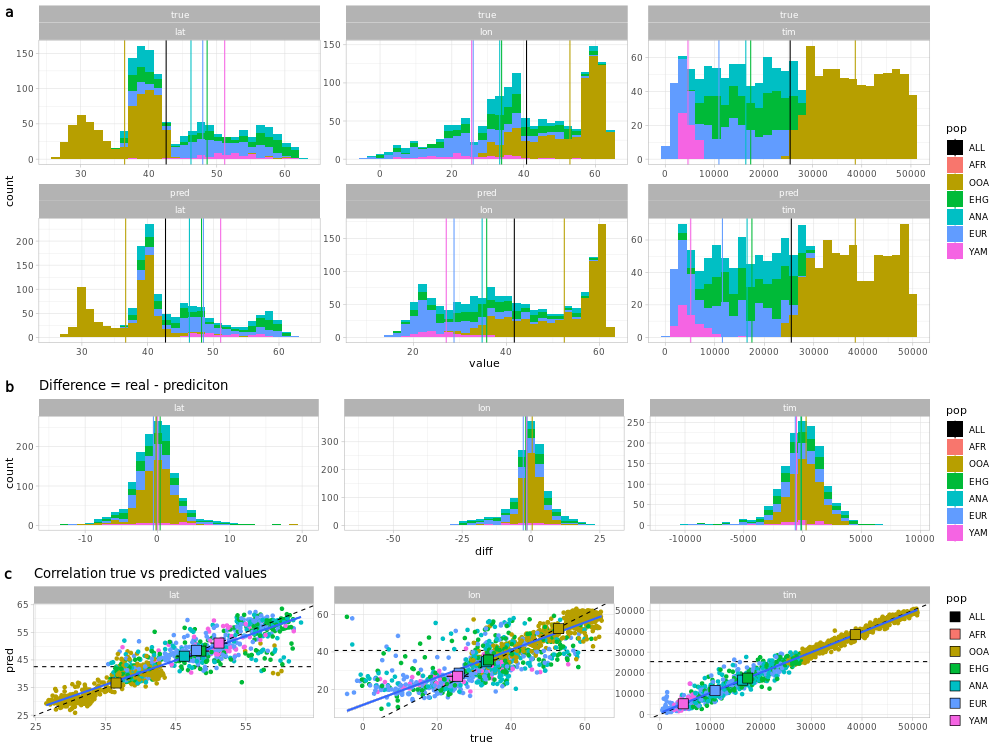

In [9]:
%%R -w 1000 -h 750

plot_grid(
    df %>%        
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_vline(data = . %>% group_by(stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(truepred~stat, scales = "free") +
        theme_light(),
    df %>%
        spread(truepred, value) %>%
        mutate(diff = true - pred) %>%
        ggplot() +
        geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = real - prediciton"),
    df %>%
        spread(truepred, value) %>%
        ggplot() +
        geom_hline(data = . %>% group_by(stat) %>% summarize(mean = mean(true)), aes(yintercept = mean), linetype = "dashed") +
        geom_point(aes(x = true, y = pred, color = pop)) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true, y = pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                     mean_true = mean(true),
                                                                     se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                     se_true   = 1.96*(sd(true)/sqrt(n()))), 
                      aes(x = mean_true, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                     mean_true = mean(true),
                                                                     se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                     se_true   = 1.96*(sd(true)/sqrt(n()))), 
                      aes(y = mean_pred, xmin = mean_true-se_true, xmax = mean_true+se_true)) +
        geom_point(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
                                                                  mean_true = mean(true)), 
                   aes(x = mean_true, y = mean_pred, fill = pop), shape = 22, size = 5) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto", rel_heights = c(2, 1, 1)
) -> plot

plot

ggsave("true_pred.pdf", width = 20*2, height = 15*1.5, units = "cm")

plot

### Error

In [10]:
%%R

df %>% 
    group_by(pop, stat) %>%
    spread(truepred, value) %>%
    summarize(mean_pred = mean(pred), mean_true = mean(true), mean_diff = mean(true-pred), sqrtdiff = mean(sqrt((true-pred)^2))) %>%
    as.data.frame() %>%
    print()

   pop stat   mean_pred   mean_true     mean_diff    sqrtdiff
1  ANA  lat    46.36547    46.21185   -0.15362883    3.101062
2  ANA  lon    34.78641    33.32926   -1.45715922    8.371964
3  ANA  tim 16530.53272 16395.30556 -135.22716204 2061.515579
4  EHG  lat    48.21064    48.58259    0.37195198    3.302207
5  EHG  lon    35.76500    33.85787   -1.90713358    7.795945
6  EHG  tim 17507.90870 17390.71429 -117.19441169 1977.447961
7  EUR  lat    48.49890    47.94111   -0.55778943    2.675313
8  EUR  lon    28.74676    25.94505   -2.80170878    7.121241
9  EUR  tim 11551.26867 10926.74476 -624.52391378 1828.730467
10 OOA  lat    36.66226    36.46846   -0.19380255    1.783590
11 OOA  lon    52.44110    52.88362    0.44252397    2.938013
12 OOA  tim 38383.42598 38676.70043  293.27445007 1068.576288
13 YAM  lat    51.12418    51.16339    0.03920468    3.380646
14 YAM  lon    27.07385    25.52694   -1.54691572    6.780934
15 YAM  tim  5146.96072  4627.46552 -519.49519828 1399.614491


In [11]:
%%R

get_diff_data <- function(exp){
    if(exp %in% c(23, 70, 71)){
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon)) %>%
            rename(space = diff_space) %>%
            gather("stat", "value", c(space)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }else if(exp == 24){
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_tim,  pred_tim)) %>%
            rename(time = diff_time) %>%
            gather("stat", "value", c(time)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }else{
        read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>%
            rename(time = diff_time, space = diff_space) %>%
            gather("stat", "value", c(time, space)) %>% 
            left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind"))
    }
}

get_diff_data(5) %>%
    head()

     sim exp       nam typ gro   ind idx  snp      run stat      value pop
1 europe   5 reference  gt   0 41517  44 1344 2.434874 time -1498.4258 YAM
2 europe   5 reference  gt   0 37861 118 1344 2.434874 time  1245.9673 ANA
3 europe   5 reference  gt   0  5791 511 1344 2.434874 time   426.2305 OOA
4 europe   5 reference  gt   1 10238 212 1344 2.421335 time  -794.0273 OOA
5 europe   5 reference  gt   1  6002 414 1344 2.421335 time  -717.3398 OOA
6 europe   5 reference  gt   1 24096 812 1344 2.421335 time -1874.9062 ANA


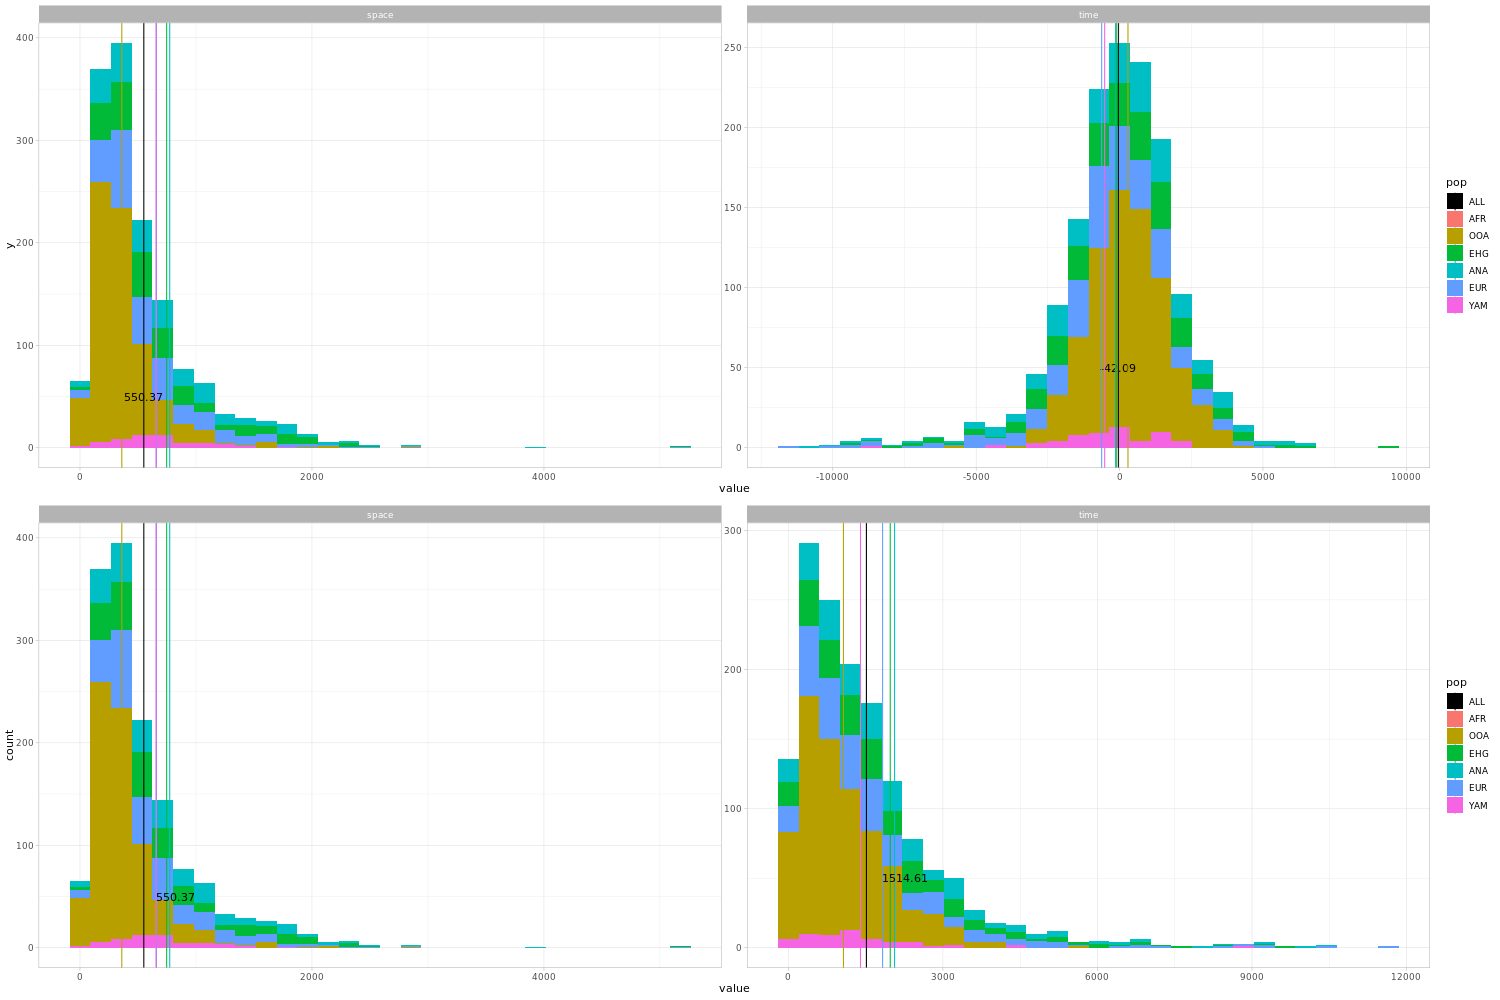

In [12]:
%%R -w 1500 -h 1000

exp = "5"

plot_grid(
    get_diff_data(exp) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean, y = 50, label = round(mean, 2))) +
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +    
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    get_diff_data(exp) %>%
        mutate(value = sqrt(value^2)) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean+(mean*0.5), y = 50, label = round(mean, 2))) +
        ylab("count") +
        scale_color_manual(values=col_pop) +
        scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    nrow = 2) -> plot

plot

ggsave("diff.pdf", width = 20*1.5, height = 15*1.5, units = "cm")

plot

Get the data for all experiments

In [13]:
%%R

error_spaceNNtime_all_scenarios_per_pop <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              get_diff_data(exp) %>%
                                  mutate(value = abs(value)) %>%
                                  group_by(sim, exp, nam, typ, stat, pop) %>%
                                  summarize(mean = mean(value),
                                            n    = n(),
                                            sd   = sd(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_per_pop <- error_spaceNNtime_all_scenarios_per_pop()
head(all_scenarios_per_pop)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
# A tibble: 6 × 10
# Groups:   sim, exp, nam, typ, stat [2]
  sim    exp   nam   typ   stat  pop    mean     n    sd    se
  <chr>  <fct> <chr> <chr> <chr> <chr> <dbl> <int> <dbl> <dbl>
1 europe 1     loss  gt    space ANA   2925.   222 1275.  85.6
2 europe 1     loss  gt    space EHG   3046.   230 1229.  81.0
3 europe 1     loss  gt    space EUR   3598.   284 1141.  67.7
4 europe 1     loss  gt    space OOA   1848.   689 1283.  48.9
5 europe 1     loss  gt    space YAM   4562.    57  672.  89.0
6 europe 1 

In [14]:
%%R

error_spaceNNtime_all_scenarios_all <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              get_diff_data(exp) %>%
                                  mutate(value = abs(value)) %>%
                                  group_by(sim, exp, nam, typ, stat) %>%
                                  summarize(mean = mean(value),
                                            n    = n(),
                                            sd   = sd(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_all <- error_spaceNNtime_all_scenarios_all()
head(all_scenarios_all)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
# A tibble: 6 × 9
# Groups:   sim, exp, nam, typ [3]
  sim    exp   nam   typ   stat   mean     n    sd    se
  <chr>  <fct> <chr> <chr> <chr> <dbl> <int> <dbl> <dbl>
1 europe 1     loss  gt    space 2635.  1482 1468.  38.1
2 europe 1     loss  gt    time  1486.  1482 1468.  38.1
3 europe 2     loss  gt    space 2638.  1482 1460.  37.9
4 europe 2     loss  gt    time  1482.  1482 1498.  38.9
5 europe 3     loss  gt    space 2015.  1480 1173.  30.5
6 europe 3     loss  gt    time  1527.  1480 1494.  38.8


### Plots

In [15]:
%%R

all_scenarios_all %>%
    head()

# A tibble: 6 × 9
# Groups:   sim, exp, nam, typ [3]
  sim    exp   nam   typ   stat   mean     n    sd    se
  <chr>  <fct> <chr> <chr> <chr> <dbl> <int> <dbl> <dbl>
1 europe 1     loss  gt    space 2635.  1482 1468.  38.1
2 europe 1     loss  gt    time  1486.  1482 1468.  38.1
3 europe 2     loss  gt    space 2638.  1482 1460.  37.9
4 europe 2     loss  gt    time  1482.  1482 1498.  38.9
5 europe 3     loss  gt    space 2015.  1480 1173.  30.5
6 europe 3     loss  gt    time  1527.  1480 1494.  38.8


In [16]:
%%R

plot_errors <- function(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE, plotspacetime = "sNNt"){
    
    ggplot() +
        geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
        geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "space"),
                   aes(x = exp, y = mean, color = pop), alpha = 0.5) +
        geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
        geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, y = mean, color = "ALL"), size = 3) +
        geom_text(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "space"),
                   aes(x = exp, y = mean*1.25, label = n)) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        scale_color_manual(values=col_pop) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot1
    if(ylimspace[1] != "None"){
        plot1 + coord_cartesian(ylim = ylimspace) -> plot1
    }
    if(nolegend){
        plot1 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot1
    }
    if(plotspacetime == "space"){
        plot2 <- NULL
    }else{
        ggplot() +
            geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                       aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
            geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                       aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
            geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop, stat == "time"),
                       aes(x = exp, y = mean, color = pop), alpha = 0.5) +
            geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                       aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
            geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                       aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
            geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                       aes(x = exp, y = mean, color = "ALL"), size = 3) +
            geom_text(data = all_scenarios_all %>% filter(exp %in% exp_to_plot, stat == "time"),
                       aes(x = exp, y = mean*1.25, label = n)) +
            labs(x = xlab, y = ylab) +
            scale_x_discrete(labels=labels, limits = limits) +
            scale_color_manual(values=col_pop) +
            facet_wrap(stat~., nrow = 2, scales = "free") +
            theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
            theme_light() -> plot2
        if(ylimtime[1] != "None"){
            plot2 + coord_cartesian(ylim = ylimtime) -> plot2
        }
        if(nolegend){
            plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
        }
    }
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot1, plot2, ncol = 1, rel_heights=c(0.1, 1, 1))

}

In [18]:
%%R

all_scenarios_all %>%
    filter(exp == 5)

# A tibble: 2 × 9
# Groups:   sim, exp, nam, typ [1]
  sim    exp   nam       typ   stat   mean     n    sd    se
  <chr>  <fct> <chr>     <chr> <chr> <dbl> <int> <dbl> <dbl>
1 europe 5     reference gt    space  550.  1482  490.  12.7
2 europe 5     reference gt    time  1515.  1482 1495.  38.8


In [20]:
%%R

all_scenarios_all %>%
    filter(exp %in% c(5, 23, 24, 70, 71))

# A tibble: 6 × 9
# Groups:   sim, exp, nam, typ [5]
  sim    exp   nam        typ   stat   mean     n    sd    se
  <chr>  <fct> <chr>      <chr> <chr> <dbl> <int> <dbl> <dbl>
1 europe 5     reference  gt    space  550.  1482  490.  12.7
2 europe 5     reference  gt    time  1515.  1482 1495.  38.8
3 europe 23    prediction gt    space  491.  1500  449.  11.6
4 europe 24    prediction gt    time  1504.  1482 1487.  38.6
5 europe 70    loss       gt    space  490.  1500  446.  11.5
6 europe 71    loss       gt    space  541.  1500  453.  11.7


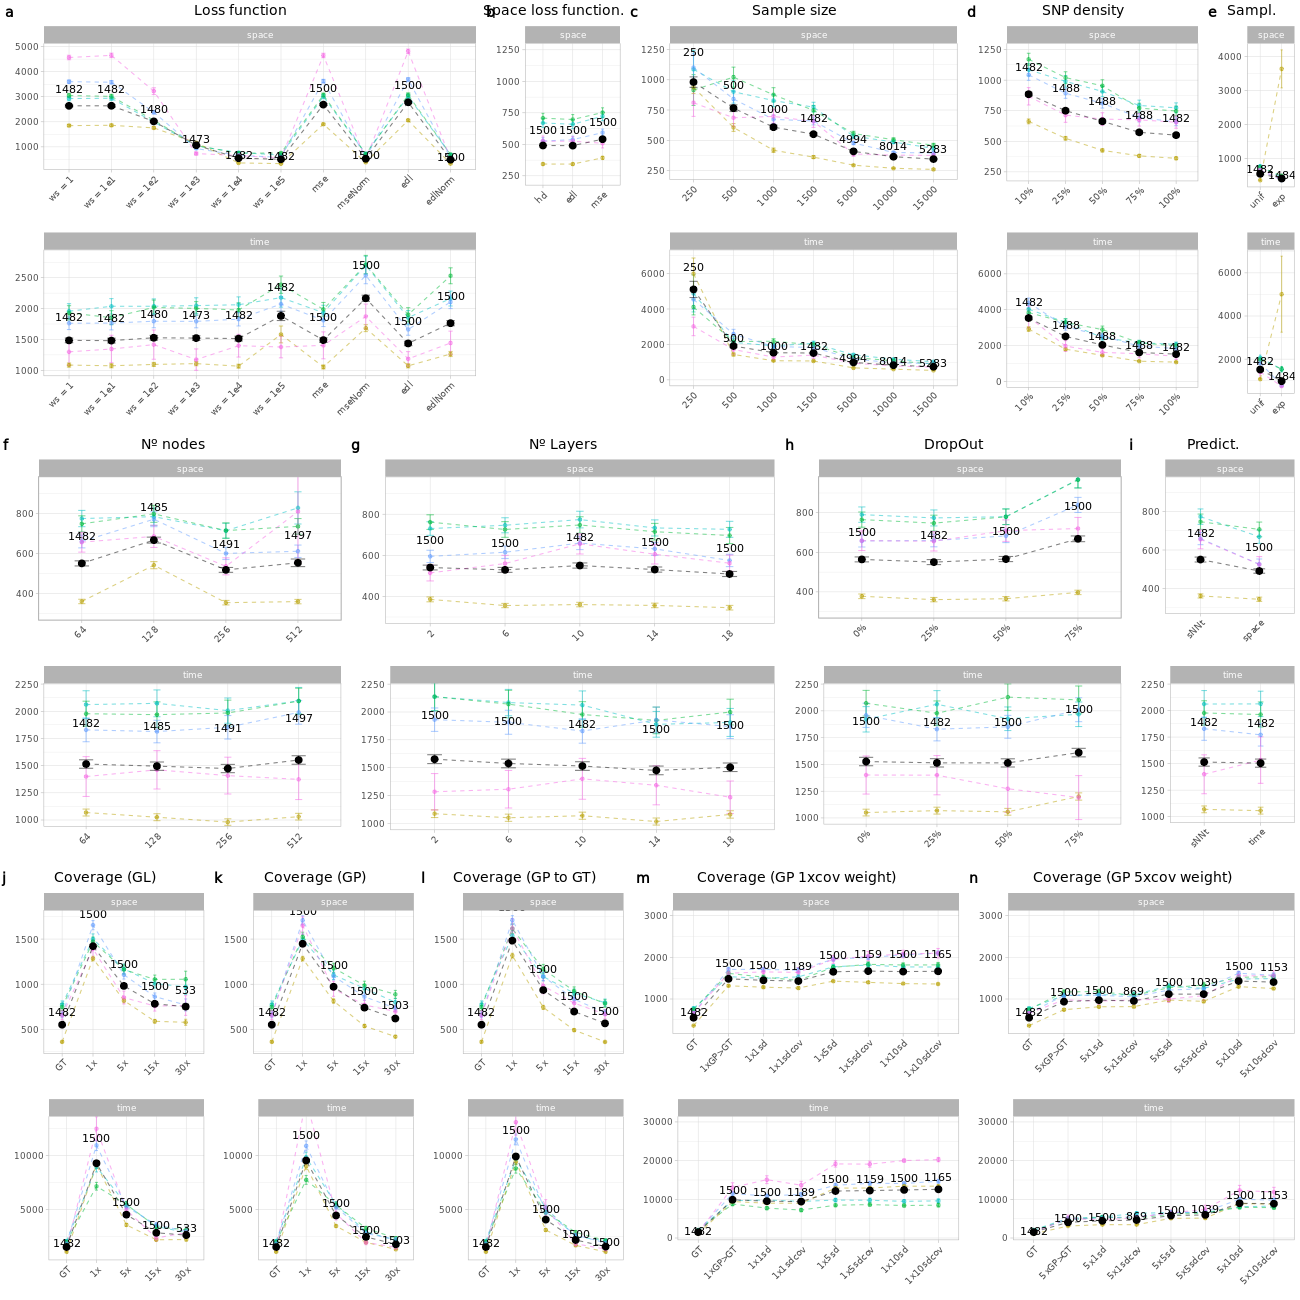

In [36]:
%%R -w 1300 -h 1300

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 9, 10, 11)
labels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", 
                "8" = "mse", "9" = "mseNorm", "10" = "edl", "11" = "edlNorm")
limits      = c("1", "2", "3", "4", "5", "6", "8", "9", "10", "11")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "") -> p_los



filter_pop  = c()
exp_to_plot = c(23, 70, 71)
labels      = c("23" = "hd", "70" = "edl", "71" = "mse")
limits      = c("23", "70", "71")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Space loss function.", "", "", c(225, 1250), c("None", "None"), TRUE, "space") -> p_spa

filter_pop  = c()
exp_to_plot = c(12, 13, 14, 5, 15, 16, 17)
labels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)
limits      = c("17", "16", "15", "5", "14", "13", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", c(225, 1250), c(0, 7000)) -> p_siz

filter_pop  = c()
exp_to_plot = c(5, 19, 20, 21, 22)
labels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")
limits      = c("22", "21", "20", "19", "5")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", c(225, 1250), c(0, 7000)) -> p_snp

filter_pop  = c()
exp_to_plot = c(5, 18)
labels      = c("5" = "unif", "18" = "exp")
limits      = c("5", "18")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "") -> p_sam

#----------------------------------------------------------------------------

filter_pop  = c()
exp_to_plot = c(5, 25, 26, 27)
labels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")
limits      = c("5", "25", "26", "27")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "", c(300, 950), c(1000, 2200)) -> p_nod

filter_pop  = c()
exp_to_plot = c(66, 67, 5, 68, 69)
labels      = c("66" = "2", "67" = "6", "5" = "10", "68" = "14", "69" = "18")
limits      = c("66", "67", "5", "68", "69")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº Layers", "", "", c(300, 950), c(1000, 2200)) -> p_lay


filter_pop  = c()
exp_to_plot = c(62, 5, 63, 64)
labels      = c("62" = "0%", "5" = "25%", "63" = "50%", "64" = "75%")
limits      = c("62", "5", "63", "64")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "DropOut", "", "", c(300, 950), c(1000, 2200)) -> p_dro

filter_pop  = c()
exp_to_plot = c(5, 23, 24)
labels      = c("5" = "sNNt", "23" = "space", "24" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "", c(300, 950), c(1000, 2200)) -> p_pre


#----------------------------------------------------------------------------

filter_pop  = c()
exp_to_plot = c(5, 28, 29, 30, 31)
labels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")
limits      = c("5", "28", "29", "30", "31")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", c(300, 1750), c(900, 13000)) -> p_gli


filter_pop  = c()
exp_to_plot = c(5, 38, 39, 40, 41)
labels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")
limits      = c("5", "38", "39", "40", "41")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", c(300, 1750), c(900, 13000)) -> p_gpr


filter_pop  = c()
exp_to_plot = c(5, 48, 49, 50, 51)
labels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")
limits      = c("5", "48", "49", "50", "51")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", c(300, 1750), c(900, 13000)) -> p_gpt


filter_pop  = c()
exp_to_plot = c(5, 48, 38, 52, 53, 54, 55, 56)
labels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1x1sd", "52" = "1x1sdcov", "53" = "1x5sd", "54" = "1x5sdcov", "55" = "1x10sd", "56" = "1x10sdcov")
limits      = c("5", "48", "38", "52", "53", "54", "55", "56")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", c(300, 3000), c(900, 30000)) -> p_co1

filter_pop  = c()
exp_to_plot = c(5, 49, 39, 57, 58, 59, 60, 61)
labels      = c("5" = "GT", "49" = "5xGP>GT", "39" = "5x1sd", "57" = "5x1sdcov", "58" = "5x5sd", "59" = "5x5sdcov", "60" = "5x10sd", "61" = "5x10sdcov")
limits      = c("5", "49", "39", "57", "58", "59", "60", "61")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "", c(300, 3000), c(900, 30000)) -> p_co5



plot_grid(
    plot_grid(p_los, p_spa, p_siz, p_snp, p_sam, nrow = 1, rel_widths = c(10, 3, 7, 5, 2), labels = c("a", "b", "c", "d", "e")),
    plot_grid(p_nod, p_lay, p_dro, p_pre,        nrow = 1, rel_widths = c( 4, 5, 4, 2),    labels = c("f", "g", "h", "i")),
    plot_grid(p_gli, p_gpr, p_gpt, p_co1, p_co5, nrow = 1, rel_widths = c( 5, 5, 5, 8, 8), labels = c("j", "k", "l", "m", "n")),
    ncol = 1
) -> plot

plot

ggsave("error_with_pop.pdf", width = 36, height = 36, units = "cm")

plot 

In [88]:
%%R

all_scenarios_all %>%
    filter(exp %in% c(5, 38, 39, 40, 41),
           stat == "time") %>%
    ungroup() %>%
    mutate(mean = 1-((mean)/(max(mean)))) %>%
    mutate(mean = mean*0.5+0.5)

# A tibble: 5 × 7
  sim    exp   nam       typ   stat   mean    se
  <chr>  <fct> <chr>     <chr> <chr> <dbl> <dbl>
1 europe 5     reference gt    time  0.920  38.8
2 europe 38    gp        gp    time  0.5   194. 
3 europe 39    gp        gp    time  0.767 104. 
4 europe 40    gp        gp    time  0.871  57.0
5 europe 41    gp        gp    time  0.907  45.3


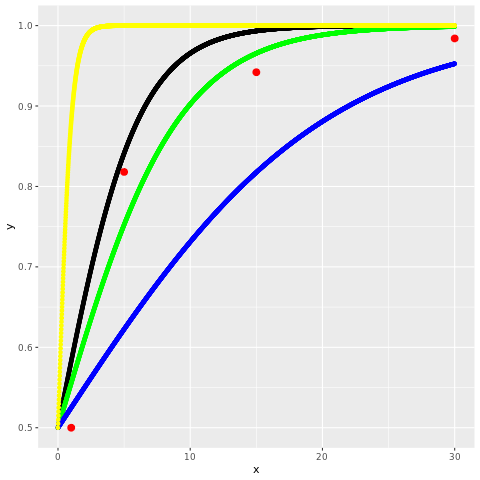

In [116]:
%%R

data.frame(x = seq(0, 30, 0.01)) %>%
    mutate(y = 1/(1+exp(-x/3))) %>%
    mutate(y2 = 1/(1+exp(-x/4.5))) %>%
    mutate(y3 = 1/(1+exp(-x/10))) %>%
    mutate(y4 = 1/(1+exp(-x*2))) %>%
    #mutate(y = 1/(1+exp(-x)) %>%
    ggplot() +
    geom_point(aes(x = x, y = y)) +
    geom_point(aes(x = x, y = y2), color = "green") +
    geom_point(aes(x = x, y = y3), color = "blue") +
    geom_point(aes(x = x, y = y4), color = "yellow") +
    geom_point(data = data.frame(x = c(1, 5, 15, 30),
                                y = c(0.5, 0.818, 0.942, 0.984)), aes(x = x, y = y), color = "red", size = 3)
           

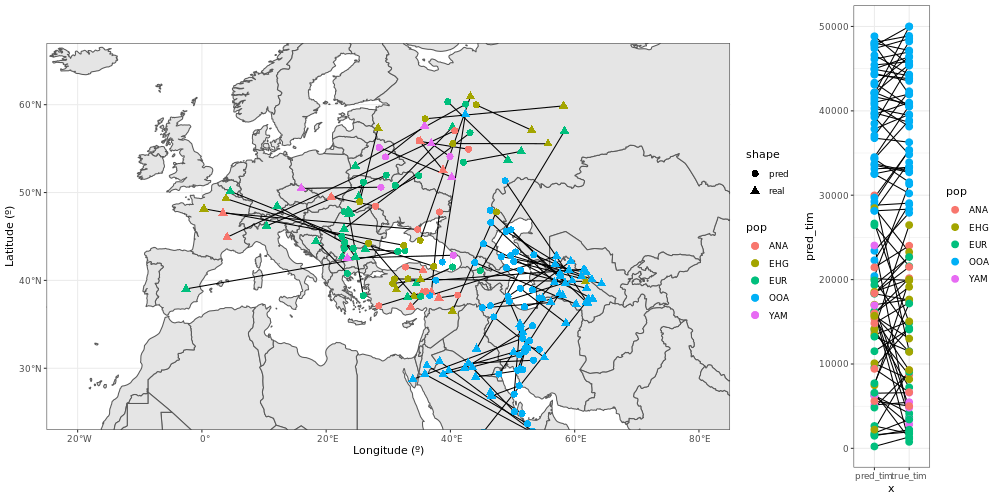

In [36]:
%%R -w 1000 -h 500

exp = "56"
sim = "europe"

set.seed(1234)

plot_grid(
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    #sample_n(100, replace = FALSE) %>%
    ggplot() +
    geom_sf(data = ne_countries(scale = "medium", returnclass = "sf")) +
    geom_segment(aes(x = pred_lon, xend = true_lon, y = pred_lat, yend = true_lat)) +
    geom_point(aes(x = true_lon, y = true_lat, color = pop, shape = "real"),  size = 3) +
    geom_point(aes(x = pred_lon, y = pred_lat, color = pop, shape = "pred"),  size = 3) +
    coord_sf(ylim = c(25, 65), xlim = c(-20, 80)) +
    xlab("Longitude (º)") +
    ylab("Latitude (º)") +
    theme_bw(),
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    select(sim, exp, nam, typ, gro, ind, pop, idx, snp, true_tim, pred_tim) %>%
    gather("truepred", "value", c(true_tim, pred_tim)) %>% 
    ggplot() +
    geom_segment(data = . %>% spread(truepred, value), aes(x = "pred_tim", xend = "true_tim", y = pred_tim, yend = true_tim)) +
    geom_point(aes(x = truepred, y = value, color = pop), size = 3) +
    theme_bw(),
              nrow = 1, rel_widths = c(4, 1))
    

In [30]:
%%R

coveragevserror <- function(exp, ylim, title){
    get_diff_data(exp) %>%
        mutate(value = abs(value)) %>%
        left_join(read.table(paste("../../sandbox/europe/", exp, "/coverage.txt", sep = ""), header = T) %>% mutate(cov = co1+co2) %>% select(ind, cov), by = c("ind")) %>%
        ggplot() +
        geom_point(aes(x = value, y = cov)) +
        geom_smooth(method = "lm", formula = "y ~ x", aes(x = value, y = cov)) +
        ylab("Coverage") +
        xlab("Error") +
        coord_cartesian(ylim = ylim)+
        facet_wrap(.~stat, scales="free_x") -> scatterplot
    
    read.table(paste("../../sandbox/europe/", exp, "/coverage.txt", sep = ""), header = T) %>% 
        mutate(cov = co1+co2) %>% 
        select(ind, cov) %>%
        ggplot() +
        geom_histogram(aes(x = cov), bins = 50) + 
        theme(axis.text.y  = element_blank(),
              axis.title.y = element_blank(),
              axis.ticks.y = element_blank()) +
        facet_wrap("Coverage"~.) +
        coord_flip(xlim = ylim) -> hist_cov
    
    get_diff_data(exp) %>%
        mutate(value = abs(value)) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 50) +
        theme(axis.text.x  = element_blank(),
              axis.title.x = element_blank(),
              axis.ticks.x = element_blank()) +
        ggtitle(title) +
        facet_wrap(.~stat, scales="free_x") -> hist_err
    
    plot_grid(
        hist_err, 
        NULL,
        scatterplot,
        hist_cov,
        rel_widths  = c(4, 1),
        rel_heights = c(1, 4)
    )
}
    


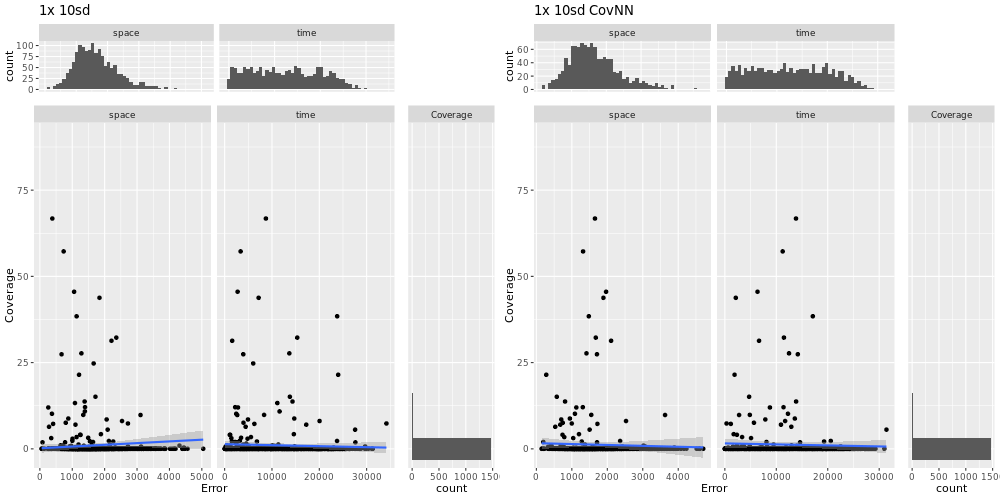

In [31]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("55", ylim = c(-1, 90), title = "1x 10sd"),
coveragevserror("56", ylim = c(-1, 90), title = "1x 10sd CovNN"))

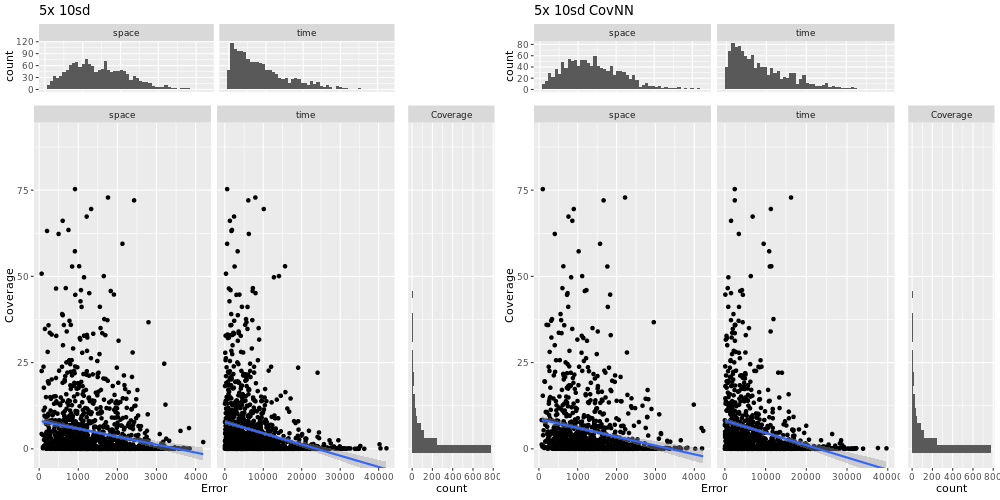

In [32]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("60", ylim = c(-1, 90), title = "5x 10sd"),
coveragevserror("61", ylim = c(-1, 90), title = "5x 10sd CovNN"))

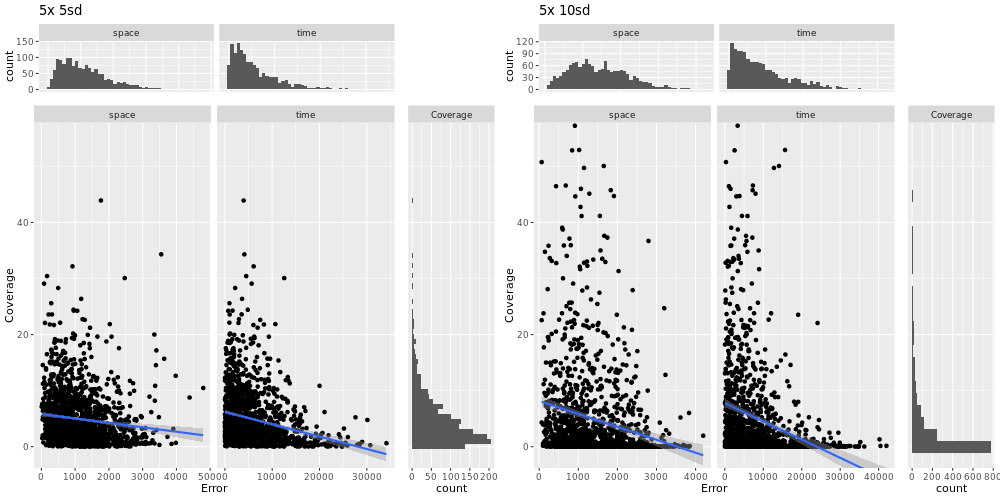

In [33]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("58", ylim = c(-1, 55), title = "5x 5sd"),
coveragevserror("60", ylim = c(-1, 55), title = "5x 10sd"))